In [6]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

40


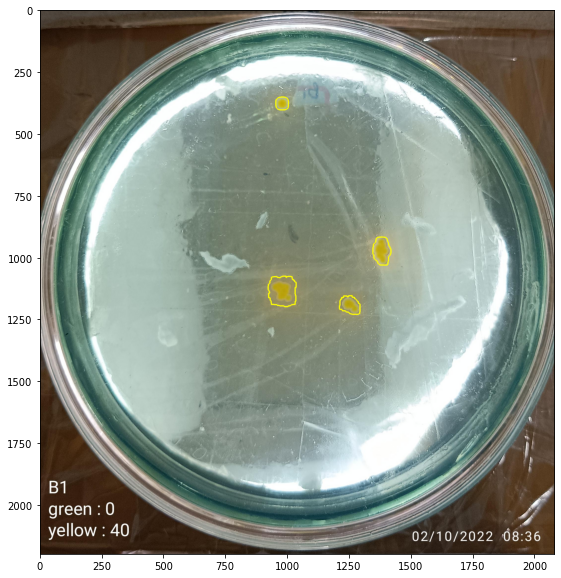

In [11]:
# Yellow vibrio
image = cv2.imread('vibrio_mae/1-6-vibrio.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([22, 93, 0], dtype="uint8")
upper = np.array([45, 255, 255], dtype="uint8")
mask = cv2.inRange(image, lower, upper)

# cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
blur = cv2.GaussianBlur(mask, (5, 5), 1)
canny = cv2.Canny(blur, 50, 150)  
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(canny, kernel, iterations=6)
cnt, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

yellow = 0
areas = []

for c in cnt:
    area = cv2.contourArea(c)
    areas.append(area)

for i in range(len(cnt)):
    if (2000 < areas[i] < 50000):
        yellow += 1
        cv2.drawContours(rgb, cnt[i], -1, (255, 255, 0), 3)

plt.figure(figsize=(20, 10))
plt.imshow(rgb)
print(yellow*10)

0


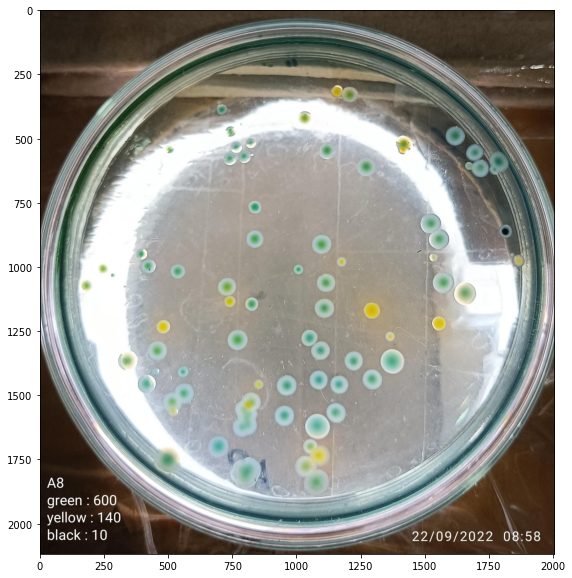

In [40]:
# Green Vibrio
image = cv2.imread('vibrio_mae/8-74-vibrio.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)
lower = np.array([156, 52, 64], dtype="uint8")
upper = np.array([164, 44, 71], dtype="uint8")
mask = cv2.inRange(image, lower, upper)

# cnt = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnt = cnt[0] if len(cnt) == 2 else cnt[1]

blur = cv2.GaussianBlur(mask, (5, 5), 1)
canny = cv2.Canny(blur, 50, 150)  
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(canny, kernel, iterations=6)
cnt, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

green = 0
areas = []

for c in cnt:
    area = cv2.contourArea(c)
    areas.append(area)

for i in range(len(cnt)):
    if (10000 < areas[i] < 40000):
        green += 1
        cv2.drawContours(rgb, cnt[i], -1, (0, 255, 0), 3)

plt.figure(figsize=(20, 10))
plt.imshow(rgb)
print(green*10)